### There is only one data set for this makeup: MSIS_salaries.csv. Use this .csv and answer the following questions.

Answer the following questions  in a Jupyter notebook. Use Markdown cells to clearly identify which question(s) you are answering.

### 1. Describe the data set in terms of how many rows and columns are there.

### 2. Find all job titles that have more than 7% of entries 

### 3. Create a histogram of NA counts (by column).
### 4 Design a graph using Seaborne to compare the distribution of the highest on average paying job title and the lowest average paying job title. If there are two jobs that are on average paid the same, pick whichever you would like.

### 5. Create a column that assigns each row a unique identifier (and id number). Rename columns into [Identifier], [age], [industry], [job_title], [currency], [location], and [post_college experience].

### 6. Use the identifiers that you created from question 4. Find entries that contain annual salaries that are over 60,000 (also can be shown as 60000) and have less or equal to 5 years of professional work experience. Show your findings in one table and show at least 11 rows of that table.

### 7. Create a new column that shows true of false on whether their job tiltes are Data Scientist or containing "Data Scien". Show how many of them are there in this data set and what location contains the most of them. If two or more locations have the same amount of results, show all of them. Show your findings in one table.

### 8. If you are over or equal to 25 years old, what is the probability that you make over or equal to 100k. Use some kind of statistical framework to show how you can achieve that goal by taking advantages of your location, industry and professional experience.

### 9. Find 3 interesting insights from the data set. Write a brief report on these insights as if you are going to present to the corresponding HR data science team in your company. The report should be written in a Jupyter Notebook using markdown, and should not be excessively long. Show your findings, mention the model or technique used to identify each finding, but do not go into details about your code.

### 10. Create a regression model to to predict a person's salary.

### 11. Create a classification model to to predict a person's job title.
### 12 (Bonus Question): Create a clustering model and use it to identify an interesting pattern.

<b> PS:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
<li>Your code is unnecessarily slow (you use a for loop, or you use DataFrame.apply unnecessarily, etc)
<li>You answer is composed of more than one output and it is not clear which question(s) you are answering</ul>
   Note:
<ul>  You are responsible for importing the csv yourself, dealing with NA's, and cleaning and preparing the data. This is a real-world dataset, with all the typos, mistakes, and random commentary you will see in your careers.

Good luck!
</ul>

# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import scipy.stats as stats
from statsmodels.regression import linear_model
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
import requests
import json
import csv
from tqdm import *
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Get the data

In [2]:
df = pd.read_csv("MSIS_salaries.csv")

In [3]:
states = pd.read_csv('states.csv')

In [4]:
cities = pd.read_csv('cities.csv')

In [5]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,What is your annual salary?,Please indicate the currency,Where are you located? (City/state/country),How many years of post-college professional work experience do you have?
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years


# Rename columns

In [6]:
columnName=['Timestamp','Age','Industry','Job_Title','Annual_Salary',\
            'Currency','Location','Work_Exp']

In [7]:
df.columns = columnName

In [8]:
df.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years


In [9]:
org_df = df.copy()

# Data Cleaning

In [10]:
df_clean = df.copy()

In [11]:
df_clean.isna().sum()

Timestamp           0
Age              2258
Industry         2680
Job_Title        2259
Annual_Salary    2259
Currency         2258
Location         2980
Work_Exp         2258
dtype: int64

In [12]:
len(df_clean)

20268

In [13]:
#df_clean.dtypes

## Filling NA values with Unknown in String columns 

In [14]:
df_clean['Industry'].fillna('Unknown', inplace = True)

In [15]:
df_clean['Job_Title'].fillna('Unknown', inplace = True)

In [16]:
#df_clean['Currency'].fillna('Unknown', inplace = True)

In [17]:
df_clean['Location'].fillna('Unknown', inplace = True)

In [18]:
df_clean['Work_Exp'].fillna('Unknown', inplace = True)

In [19]:
df_clean.isna().sum()

Timestamp           0
Age              2258
Industry            0
Job_Title           0
Annual_Salary    2259
Currency         2258
Location            0
Work_Exp            0
dtype: int64

Drop NA in numeric columns such as Age and Salary as we do not want to take average and skew our data.

In [20]:
df_clean = df_clean.dropna()

In [21]:
df_clean.isna().sum()

Timestamp        0
Age              0
Industry         0
Job_Title        0
Annual_Salary    0
Currency         0
Location         0
Work_Exp         0
dtype: int64

In [22]:
len(df_clean)

18009

In [23]:
df_clean.shape

(18009, 8)

In [24]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,"65,000",USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,"36,330",USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years
5,4/24/2019 11:43:29,25-34,Information Management,Associate Consultant,"45,000",USD,"Seattle, WA",8 - 10 years
6,4/24/2019 11:43:30,25-34,Nonprofit,Development Manager,"51,000",USD,"Dallas, Texas, United States",2 - 4 years
7,4/24/2019 11:43:30,25-34,Higher Education,Student Records Coordinator,"54,371",USD,Philadelphia,8 - 10 years
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000,USD,"Bridgeport, mi. Usa",8 - 10 years
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000,USD,DC,11 - 20 years


## Cleaning Annual Salary

In [25]:
df_clean['Annual_Salary'] = df_clean['Annual_Salary'].str.replace(',','')

In [26]:
df_clean['Annual_Salary'].head()

0    75000
1    65000
2    36330
3    34600
4    55000
Name: Annual_Salary, dtype: object

In [27]:
df_clean['Annual_Salary'] = df_clean['Annual_Salary'].str.replace('$','')

In [28]:
df_clean['Annual_Salary'] = df_clean['Annual_Salary'].str.replace(' ','')

In [29]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000,USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330,USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000,USD,"Southeast Michigan, USA",5-7 years
5,4/24/2019 11:43:29,25-34,Information Management,Associate Consultant,45000,USD,"Seattle, WA",8 - 10 years
6,4/24/2019 11:43:30,25-34,Nonprofit,Development Manager,51000,USD,"Dallas, Texas, United States",2 - 4 years
7,4/24/2019 11:43:30,25-34,Higher Education,Student Records Coordinator,54371,USD,Philadelphia,8 - 10 years
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000,USD,"Bridgeport, mi. Usa",8 - 10 years
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000,USD,DC,11 - 20 years


In [30]:
(df_clean['Annual_Salary'].str.lower().str.contains('variable')).sum()

5

In [31]:
df_clean['Annual_Salary'] = df_clean['Annual_Salary'].str.extract('(\d+)')

In [32]:
(df_clean['Annual_Salary'].str.lower().str.contains('variable')).sum()

0

In [33]:
(df_clean['Annual_Salary'].str.lower().str.contains('ish')).sum()

0

In [34]:
df_clean['Annual_Salary'] = df_clean['Annual_Salary'].astype(float)

In [35]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000.0,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600.0,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000.0,USD,"Southeast Michigan, USA",5-7 years
5,4/24/2019 11:43:29,25-34,Information Management,Associate Consultant,45000.0,USD,"Seattle, WA",8 - 10 years
6,4/24/2019 11:43:30,25-34,Nonprofit,Development Manager,51000.0,USD,"Dallas, Texas, United States",2 - 4 years
7,4/24/2019 11:43:30,25-34,Higher Education,Student Records Coordinator,54371.0,USD,Philadelphia,8 - 10 years
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi. Usa",8 - 10 years
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,11 - 20 years


In [36]:
df_clean['Annual_Salary'].isna().sum()

4

# Replace blank records for Annual Salary with the mean

In [37]:
df_clean['Annual_Salary'].fillna(value=df_clean['Annual_Salary'].mean(), inplace=True)

In [38]:
df_clean['Annual_Salary'].isna().sum()

0

In [39]:
len(df_clean)

18009

In [40]:
df_clean.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000.0,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600.0,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000.0,USD,"Southeast Michigan, USA",5-7 years


## Converting other currencies into USD

In [41]:
df_clean.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000.0,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600.0,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000.0,USD,"Southeast Michigan, USA",5-7 years


In [42]:
df_clean['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'SEK', 'Other', 'AUD/NZD', 'JPY',
       'CHF', 'HKD', 'ZAR'], dtype=object)

In [43]:
def to_usd(line):
    if line == 'GBP':
        return (1.27)
    elif line == 'HKD':
        return (0.13)
    elif line == 'EUR':
        return (1.27)
    elif line == 'CAD':
        return (0.75)
    elif line == 'SEK':
        return (0.11)
    elif line == 'AUD/NZD':
        return (0.69)
    elif line == 'JPY':
        return (0.01)
    elif line == 'ZAR':
        return (0.06)
    else:
        return (1)

In [44]:
df_clean['Conversion'] = df_clean['Currency'].apply(to_usd)

In [45]:
#df_clean

In [46]:
df_clean['Conversion'].isna().sum()

0

In [47]:
df_clean['Annual_Salary_2'] = df_clean['Annual_Salary'] * df_clean['Conversion']

In [48]:
df_clean.head(10)

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Conversion,Annual_Salary_2
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000.0,USD,"Nashville, TN",11 - 20 years,1.00,75000.0
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",8 - 10 years,1.00,65000.0
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",2 - 4 years,1.00,36330.0
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,34600.0,GBP,"Cardiff, UK",5-7 years,1.27,43942.0
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000.0,USD,"Southeast Michigan, USA",5-7 years,1.00,55000.0
5,4/24/2019 11:43:29,25-34,Information Management,Associate Consultant,45000.0,USD,"Seattle, WA",8 - 10 years,1.00,45000.0
6,4/24/2019 11:43:30,25-34,Nonprofit,Development Manager,51000.0,USD,"Dallas, Texas, United States",2 - 4 years,1.00,51000.0
7,4/24/2019 11:43:30,25-34,Higher Education,Student Records Coordinator,54371.0,USD,Philadelphia,8 - 10 years,1.00,54371.0
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi. Usa",8 - 10 years,1.00,45000.0
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,11 - 20 years,1.00,80000.0


In [49]:
df_clean['Annual_Salary'] = df_clean['Annual_Salary_2']

In [50]:
#df_clean

In [51]:
df_clean['Annual_Salary'].isna().sum()

0

In [52]:
df_clean = df_clean.drop(columns= ['Annual_Salary_2', 'Conversion'])

In [53]:
df_clean.head(5)

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000.0,USD,"Nashville, TN",11 - 20 years
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",8 - 10 years
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",2 - 4 years
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",5-7 years
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000.0,USD,"Southeast Michigan, USA",5-7 years


In [54]:
df_clean['Annual_Salary'].describe()

count    1.800900e+04
mean     1.125268e+05
std      1.410063e+06
min      0.000000e+00
25%      5.000000e+04
50%      7.000000e+04
75%      1.030000e+05
max      1.320000e+08
Name: Annual_Salary, dtype: float64

In [55]:
df_clean = df_clean[(df_clean['Annual_Salary'] >= 10000)]

The column 'Annual_Salary' now contains only USD values even if 'Currency' says other currency. We will keep the currency column as it is for now as it could be used to compute countries.

## Clean Work_Exp

In [56]:
df_clean['Work_Exp'].unique()

array(['11 - 20 years', '8 - 10 years', '2 - 4 years', '5-7 years',
       '21 - 30 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [57]:
df_clean['Work_Exp'].nunique()

8

In [58]:
def work_ex(line):
    if line == '11 - 20 years':
        return 15.5
    elif line == '8 - 10 years':
        return 9
    elif line == '2 - 4 years':
        return 3
    elif line == '5-7 years':
        return 6
    elif line == '21 - 30 years':
        return 25.5
    elif line == '1 year or less':
        return 1
    elif line == '41 years or more':
        return 41
    elif line == '31 - 40 years':
        return 35.5
    else:
        return 0
    

In [59]:
df_clean['Work_Exp'] = df_clean['Work_Exp'].apply(work_ex)

In [60]:
df_clean['Work_Exp'].head()

0    15.5
1     9.0
2     3.0
3     6.0
4     6.0
Name: Work_Exp, dtype: float64

In [61]:
df_clean['Work_Exp'].isna().sum()

0

In [62]:
df_clean['Work_Exp'] = df_clean['Work_Exp'].astype(int)#.head()

In [63]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst. Director,75000.0,USD,"Nashville, TN",15
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",9
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker (embedded in primary care),55000.0,USD,"Southeast Michigan, USA",6
5,4/24/2019 11:43:29,25-34,Information Management,Associate Consultant,45000.0,USD,"Seattle, WA",9
6,4/24/2019 11:43:30,25-34,Nonprofit,Development Manager,51000.0,USD,"Dallas, Texas, United States",3
7,4/24/2019 11:43:30,25-34,Higher Education,Student Records Coordinator,54371.0,USD,Philadelphia,9
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi. Usa",9
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15


## Clean Job Titles

In [64]:
df_clean['Job_Title'].nunique()

9365

In [65]:
#df_clean['Job_Title'].value_counts()

def job_title(line):
    if line.lower().find('manager'):
        return 'Manager'
    elif line.lower().find('librarian'):
        return 'Librarian'
    elif line.lower().find('specialist'):
        return 'Specialist'
    elif line.lower().find('supervisor'):
        return 'Supervisor'
    elif line.lower().find('assistant'):
        return 'Assistant'
    elif line.lower().find('advisor'):
        return 'Advisor'
    elif line.lower().find('coordinator'):
        return 'Coordinator'
    elif line.lower().find('economist'):
        return 'Economist'
    elif line.lower().find('director'):
        return 'Director'
    else:
        exit

In [66]:
df_clean['Job_Title'] = df_clean['Job_Title'].str.replace(',',' ')
df_clean['Job_Title'] = df_clean['Job_Title'].str.replace('-',' ')
df_clean['Job_Title'] = df_clean['Job_Title'].str.replace('  ',' ')
df_clean['Job_Title'] = df_clean['Job_Title'].str.replace('.',' ')

df_clean['Job_Title'] = df_clean['Job_Title'].str.replace('/',' ')
df_clean['Job_Title'] = df_clean['Job_Title'].str.replace('(',' ')
df_clean['Job_Title'] = df_clean['Job_Title'].str.replace(')',' ')

In [67]:
df_clean['Job_Title'] = df_clean['Job_Title'].str.strip()

In [68]:
df_job = df_clean.copy()
df_job.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp
0,4/24/2019 11:43:21,35-44,Government,Talent Management Asst Director,75000.0,USD,"Nashville, TN",15
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Operations Director,65000.0,USD,"Madison, Wi",9
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6
4,4/24/2019 11:43:29,25-34,Healthcare,Social worker embedded in primary care,55000.0,USD,"Southeast Michigan, USA",6


In [69]:
#df_clean['Job_Title'].value_counts()

In [70]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('data sci') == True), 'Job_Title'] = 'Data Scientist'

In [71]:
df_job.loc[(df_job['Industry'].str.lower().str.contains('ass') == True), 'Industry'] = 'Associate/Assistant'

In [72]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('manag') == True), 'Job_Title'] = 'Manager'

In [73]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('dire') == True), 'Job_Title'] = 'Director'

In [74]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('tech') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('engi') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('dev') == True), 'Job_Title'] = 'Technician/Engineer'

In [75]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('coor') == True), 'Job_Title'] = 'Co-ordinator'

In [76]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('lib') == True), 'Job_Title'] = 'Librarian'

In [77]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('teach') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('instru') == True), 'Job_Title'] = 'Teacher'

In [78]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('ana') == True), 'Job_Title'] = 'Analyst'

In [79]:
#df_job.loc[(df_job['Job_Title'].str.lower().str.contains('data sci') == True), 'Job_Title'] = 'Data Scientist'

In [80]:
#df_job.loc[(df_job['Job_Title'].str.lower().str.contains('scien') == True), 'Job_Title'] = 'Scientist'

In [81]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('acti') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('social') == True), 'Job_Title'] = 'Socialist'

In [82]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('vp') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('vice') == True), 'Job_Title'] = 'VP'

In [83]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('design') == True), 'Job_Title'] = 'Designer'

In [84]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('exec') == True), 'Job_Title'] = 'Executive'

In [85]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('admin') == True), 'Job_Title'] = 'Administrator'

In [86]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('consul') == True)| \
           (df_job['Job_Title'].str.lower().str.contains('coun') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('advi') == True), 'Job_Title'] = 'Consultant'

In [87]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('hr') == True) | \
           (df_job['Job_Title'].str.lower().str.contains('human') == True), 'Job_Title'] = 'HR'

In [88]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('archi') == True), 'Job_Title'] = 'Architect'

In [89]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('ow') == True) , 'Job_Title'] = 'Owner'

In [90]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('test') == True) , 'Job_Title'] = 'Tester'

In [91]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('lead') == True) |\
           (df_job['Job_Title'].str.lower().str.contains('head') == True), 'Job_Title'] = 'Lead'

In [92]:
df_job.loc[(df_job['Job_Title'].str.lower().str.contains('spec') == True) , 'Job_Title'] = 'Specialist'

In [93]:
#df_job['Job_Title'].str.lower().str.startswith('data sci').sum()

In [94]:
#org_df['Job_Title'].str.lower().str.startswith('data sci').sum()

In [95]:
df_job['Job_Title'].nunique()

2338

In [96]:
#df_job['Job_Title'].value_counts()

In [97]:
df_clean = df_job.copy()

def job_title(line):
    if line.lower().find('manager'):
        return 'Manager'
    elif line.lower().find('librarian'):
        return 'Librarian'
    elif line.lower().find('supervisor'):
        return 'Supervisor'
    elif line.lower().find('assistant'):
        return 'Assistant'
    elif line.lower().find('specialist'):
        return 'Specialist'
    elif line.lower().find('advisor'):
        return 'Advisor'
    elif line.lower().find('coordinator'):
        return 'Coordinator'
    elif line.lower().find('economist'):
        return 'Economist'
    elif line.lower().find('director'):
        return 'Director'
    else:
        exit

## Clean Location

In [98]:
df_clean['Location'] = df_clean['Location'].str.replace('.',',')

In [99]:
df_clean['Location'] = df_clean['Location'].str.replace('/',',')

In [100]:
df_clean['Location'] = df_clean['Location'].str.replace('  ',' ')

In [101]:
df_clean['Location'].head(15)

0                    Nashville, TN
1                      Madison, Wi
2                    Las Vegas, NV
3                      Cardiff, UK
4          Southeast Michigan, USA
5                      Seattle, WA
6     Dallas, Texas, United States
7                     Philadelphia
8              Bridgeport, mi, Usa
9                               DC
10                        Brick NJ
11        Baltimore, Maryland, USA
12            Montreal, QC, Canada
13                      London, UK
14                         Geirgia
Name: Location, dtype: object

In [102]:
#type(def location(line))

## Finding the countries

In [103]:
def country(line):
    #print(type(line))
    if line == ('USD') :
        return 'USA'
    elif line == ('CAD'):
        return 'Canada'
    elif line == ('GBP'):
        return 'UK'
    elif line == ('EUR'):
        return 'UK'
    elif line == ('AUD/NZD'):
        return 'Australia/New Zealand'
    elif line == ('SEK'):
        return 'Sweden'
    elif line == ('HKD'):
        return 'Hong Kong'
    elif line == ('JPY'):
        return 'Japan'
    elif line == ('ZAR'):
        return 'South Africa'
    elif line == ('CHF'):
        return 'Switzerland'
    else:
        exit

In [104]:
df_clean['Country'] = df_clean['Currency'].apply(country)

In [105]:
df_clean['Country'].unique()

array(['USA', 'UK', 'Canada', 'Sweden', None, 'Australia/New Zealand',
       'Japan', 'Switzerland', 'Hong Kong', 'South Africa'], dtype=object)

In [106]:
len(df_clean['Country'])

17603

In [107]:
len(df_clean)

17603

In [108]:
df_clean['Country'].unique()

array(['USA', 'UK', 'Canada', 'Sweden', None, 'Australia/New Zealand',
       'Japan', 'Switzerland', 'Hong Kong', 'South Africa'], dtype=object)

In [109]:
df_clean['Country'].isna().sum()

61

In [110]:
df_clean.isna().sum()

Timestamp         0
Age               0
Industry          0
Job_Title         0
Annual_Salary     0
Currency          0
Location          0
Work_Exp          0
Country          61
dtype: int64

In [111]:
df_clean = df_clean.dropna()

In [112]:
df_clean.isna().sum()

Timestamp        0
Age              0
Industry         0
Job_Title        0
Annual_Salary    0
Currency         0
Location         0
Work_Exp         0
Country          0
dtype: int64

## Extracting State from Location

In [113]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA


In [114]:
#df_clean['Location'] = df_clean['Location'].str.replace('.',' ')
#df_clean['Location'] = df_clean['Location'].str.replace('/',',')
#df_clean['Location'] = df_clean['Location'].str.replace('  ',' ')

In [115]:
df_clean['Location']

0                           Nashville, TN
1                             Madison, Wi
2                           Las Vegas, NV
3                             Cardiff, UK
4                 Southeast Michigan, USA
5                             Seattle, WA
6            Dallas, Texas, United States
7                            Philadelphia
8                     Bridgeport, mi, Usa
9                                      DC
10                               Brick NJ
11               Baltimore, Maryland, USA
12                   Montreal, QC, Canada
13                             London, UK
14                                Geirgia
15                        New Jersey, USA
16                      Pittsburgh,PA,USA
17                ottawa, ontario, canada
18                      Toronto,ON,Canada
19                         Washington, DC
20                      New York, NY, USA
21                        Boston, MA, USA
22                                MA, USA
23                        Wisconsi

In [116]:
loc1 = df_clean['Location'].str.split(',', n = 1, expand = True)

In [117]:
df_clean['loc1'] = loc1[0]

In [118]:
df_clean['loc2'] = loc1[1]

In [119]:
loc2 = df_clean['loc2'].str.split(',', n = 1, expand = True)

In [120]:
df_clean['loc3'] = loc2[0]

In [121]:
df_clean['loc4'] = loc2[1]

In [122]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,loc2,loc3,loc4
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,Nashville,TN,TN,None
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,Madison,Wi,Wi,None
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,Las Vegas,NV,NV,None
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,Cardiff,UK,UK,None
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,Southeast Michigan,USA,USA,None
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,Seattle,WA,WA,None
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,Dallas,"Texas, United States",Texas,United States
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,Philadelphia,None,None,None
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,Bridgeport,"mi, Usa",mi,Usa
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA,DC,None,None,None


In [123]:
#def split_uppercase(value):
 #   return re.sub(r'([A-Z])', r' \1', value)

In [124]:
#df_clean['loc'] = df_clean['loc'].apply(split_uppercase)

In [125]:
df_clean = df_clean.drop(columns= 'loc2')

In [126]:
df_clean.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,loc3,loc4
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,Nashville,TN,None
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,Madison,Wi,None
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,Las Vegas,NV,None
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,Cardiff,UK,None
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,Southeast Michigan,USA,None


In [127]:
df_clean['loc1'] = df_clean['loc1'].str.upper()
#df_clean['loc2'] = df_clean['loc2'].str.upper()
df_clean['loc3'] = df_clean['loc3'].str.upper()
df_clean['loc1'] = df_clean['loc1'].str.strip()
df_clean['loc3'] = df_clean['loc3'].str.strip()

In [128]:
df_clean.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,loc3,loc4
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN,None
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI,None
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV,None
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,UK,None
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,USA,None


In [129]:
df_clean['loc3'].isna().sum()

5120

In [130]:
states['State'] = states['State'].str.upper()

In [131]:
states.head()

,State,Abbreviation
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA


In [132]:
df1 = df_clean.copy()

In [133]:
#df1.head()

In [134]:
df1 = df1.merge(states, how = 'left', left_on = 'loc3', right_on = 'Abbreviation')

In [135]:
df1 = df1.merge(states, how = 'left', left_on = 'loc3', right_on = 'State')

In [136]:
#df1

In [137]:
df1 = df1.drop(columns = ['State_x', 'State_y'])

In [138]:
#df1

In [139]:
df1['Abbreviation_x'].fillna('', inplace = True)

In [140]:
df1['Abbreviation_y'].fillna('', inplace = True)

In [141]:
df1

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,loc3,loc4,Abbreviation_x,Abbreviation_y
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN,None,TN,
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI,None,WI,
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV,None,NV,
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,UK,None,,
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,USA,None,,
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA,None,WA,
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TEXAS,United States,,TX
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,PHILADELPHIA,None,None,,
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,BRIDGEPORT,MI,Usa,MI,
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA,DC,None,None,,


In [142]:
df1['State_1'] = df1.apply(lambda row: row.Abbreviation_x + row.Abbreviation_y, axis = 1)

In [143]:
#df1

In [144]:
df1 = df1.drop(columns = ['Abbreviation_x','Abbreviation_y', 'loc3', 'loc4'])

In [145]:
df1

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State_1
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TX
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,PHILADELPHIA,
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,BRIDGEPORT,MI
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA,DC,


In [146]:
#df1 = df1.merge(states, how = 'left', left_on = 'loc1', right_on = 'State')

In [147]:
#df1 = df1.merge(states, how = 'left', left_on = 'loc1', right_on = 'Abbreviation')

In [148]:
df1

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State_1
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TX
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,PHILADELPHIA,
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,BRIDGEPORT,MI
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA,DC,


In [149]:
#df1 = df1.drop(columns = ['State'])

In [150]:
#df1

In [151]:
#df1['Abbreviation_x'].fillna('', inplace = True)
#df1['Abbreviation_y'].fillna('', inplace = True)

In [152]:
#df1['State_2'] = df1.apply(lambda row: row.Abbreviation_x + row.Abbreviation_y, axis = 1)

In [153]:
df1.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State_1
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,


In [154]:
#df1 = df1.drop(columns = ['Abbreviation_x','Abbreviation_y'])

In [155]:
#df1['State'] = df1.apply(lambda row: row.State_1 + row.State_2, axis = 1)

In [156]:
#df1

In [157]:

#df1 = df1.drop(columns = ['State_1','State_2'])

In [158]:
#df1

In [159]:
#df_clean['loc1'] = df_clean['loc1'].str.strip()

In [160]:
df1['State'] = df1['State_1'].str.strip()

In [161]:
df1 = df1.drop(columns = ['State_1'])

In [162]:
#df1

In [335]:
#df1['State'] = df1['State'].replace('',' ', inplace = True)

In [164]:
df1

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TX
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,PHILADELPHIA,
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,BRIDGEPORT,MI
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA,DC,


In [ ]:
indexs = 

In [165]:
df_clean = df1.copy()

In [333]:
df_clean.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
5,4/24/2019 11:43:29,25-34,Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA
6,4/24/2019 11:43:30,25-34,IT,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TX


In [166]:
df_clean.isna().sum()

Timestamp        0
Age              0
Industry         0
Job_Title        0
Annual_Salary    0
Currency         0
Location         0
Work_Exp         0
Country          0
loc1             0
State            0
dtype: int64

In [167]:
states

,State,Abbreviation
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA
5,COLORADO,CO
6,CONNECTICUT,CT
7,DELAWARE,DE
8,DISTRICT OF COLUMBIA,DC
9,FLORIDA,FL


## Finding Cities 

## Clean Age

In [168]:
df_clean.Age.unique()

array(['35-44', '25-34', '18-24', '45-54', '55-64', '65 or over',
       'under 18'], dtype=object)

In [169]:
df_clean.Age.nunique()

7

Age is already categorical data. Therefore we can leave it as it is.

## Clean Industry

In [170]:
df_clean

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,Environmental nonprofit,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Market Research,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,Biotechnology,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Healthcare,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,
5,4/24/2019 11:43:29,25-34,Information Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA
6,4/24/2019 11:43:30,25-34,Nonprofit,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TX
7,4/24/2019 11:43:30,25-34,Higher Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,PHILADELPHIA,
8,4/24/2019 11:43:34,35-44,Libraries,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,BRIDGEPORT,MI
9,4/24/2019 11:43:35,25-34,Business Services,Copywriter,80000.0,USD,DC,15,USA,DC,


In [171]:
df_clean['Industry'].head(50)

0                                        Government
1                           Environmental nonprofit
2                                   Market Research
3                                     Biotechnology
4                                        Healthcare
5                            Information Management
6                                        Nonprofit 
7                                  Higher Education
8                                        Libraries 
9                                 Business Services
10                      construction fastener sales
11                                    Mental Health
12                               Telecommunications
13                                  Market research
14                                        Education
15                              Business Consulting
16                                        Higher Ed
17                                   communications
18                                Film & Television
19          

In [172]:
df_clean['Industry'].nunique()

4724

In [173]:
df_clean['Industry'] = df_clean['Industry'].str.replace(',',' ')
df_clean['Industry'] = df_clean['Industry'].str.replace('-',' ')
df_clean['Industry'] = df_clean['Industry'].str.replace('  ',' ')

df_clean['Industry'] = df_clean['Industry'].str.replace('/',' ')
df_clean['Industry'] = df_clean['Industry'].str.replace('(',' ')
df_clean['Industry'] = df_clean['Industry'].str.replace(')',' ')

In [174]:
df_clean['Industry'] = df_clean['Industry'].str.strip()

In [175]:
df123 = df_clean.copy()

In [176]:
df123.loc[(df123['Industry'].str.lower().str.contains('publish') == True) | \
          (df123['Industry'].str.lower().str.contains('edit') == True), 'Industry'] = 'Editing and Publishing'

In [177]:
df123.loc[(df123['Industry'].str.lower().str.contains('trav') == True) | \
                (df123['Industry'].str.lower().str.contains('tour') == True), 'Industry'] = 'Tourism'

In [178]:
df123.loc[(df123['Industry'].str.lower().str.contains('food') == True) | \
                (df123['Industry'].str.lower().str.contains('restau') == True) | \
          (df123['Industry'].str.lower().str.contains('coff') == True), 'Industry'] = 'Food'

In [179]:
df123.loc[(df123['Industry'].str.lower().str.contains('manu') == True) | \
                (df123['Industry'].str.lower().str.contains('indus') == True) | \
          (df123['Industry'].str.lower().str.contains('design') == True) | \
          (df123['Industry'].str.lower().str.contains('produ') == True) | \
          (df123['Industry'].str.lower().str.contains('auto') == True), 'Industry'] = 'Manufacturing'

In [180]:
df123.loc[(df123['Industry'].str.lower().str.contains('elec') == True) | \
                (df123['Industry'].str.lower().str.contains('semicon') == True), 'Industry'] = 'Electronics'

In [181]:
df123.loc[(df123['Industry'].str.lower().str.contains('trans') == True) | \
                (df123['Industry'].str.lower().str.contains('logis') == True) | \
          (df123['Industry'].str.lower().str.contains('distri') == True) | \
          (df123['Industry'].str.lower().str.contains('supply') == True) | \
          (df123['Industry'].str.lower().str.contains('ship') == True) | \
          (df123['Industry'].str.lower().str.contains('pack') == True), 'Industry'] = 'Logistics'

In [182]:
df123.loc[(df123['Industry'].str.lower().str.contains('avi') == True) | \
                (df123['Industry'].str.lower().str.contains('aero') == True) | \
          (df123['Industry'].str.lower().str.contains('air') == True), 'Industry'] = 'Aviation'

In [183]:
df123.loc[(df123['Industry'].str.lower().str.contains('manage') == True) | \
          (df123['Industry'].str.lower().str.contains('admin') == True) | \
          (df123['Industry'].str.lower().str.contains('associ') == True), 'Industry'] = 'Management'

In [184]:
df123.loc[(df123['Industry'].str.lower().str.contains('servi') == True) , 'Industry'] = 'Services'

In [185]:
df123.loc[(df123['Industry'].str.lower().str.contains('gov') == True) | \
          (df123['Industry'].str.lower().str.contains('public') == True) | \
          (df123['Industry'].str.lower().str.contains('nation') == True) | \
          (df123['Industry'].str.lower().str.contains('diplo') == True) | \
          (df123['Industry'].str.lower().str.contains('beaur') == True) | \
          (df123['Industry'].str.lower().str.contains('civil') == True), 'Industry'] = 'Government'

In [186]:
df123.loc[(df123['Industry'].str.lower().str.contains('non') == True) , 'Industry'] = 'Non Profit'

In [187]:
df123.loc[(df123['Industry'].str.lower().str.contains('it') == True) | \
                 (df123['Industry'].str.lower().str.contains('infor') == True) | \
                 (df123['Industry'].str.lower().str.contains('engi') == True) | \
                 (df123['Industry'].str.lower().str.contains('soft') == True) | \
                 (df123['Industry'].str.lower().str.contains('tech') == True) | \
                 (df123['Industry'].str.lower().str.contains('netw') == True) | \
                 (df123['Industry'].str.lower().str.contains('dev') == True) | \
          (df123['Industry'].str.lower().str.contains('graphic') == True) | \
          (df123['Industry'].str.lower().str.contains('data') == True) | \
          (df123['Industry'].str.lower().str.contains('comp') == True) | \
          (df123['Industry'].str.lower().str.contains('print') == True) | \
          (df123['Industry'].str.lower().str.contains('internet') == True) | \
          (df123['Industry'].str.lower().str.contains('code') == True), 'Industry'] = 'IT'

In [188]:
df123.loc[(df123['Industry'].str.lower().str.contains('consul') == True) | \
                  (df123['Industry'].str.lower().str.contains('advi ') == True) |\
          (df123['Industry'].str.lower().str.contains('coun') == True), 'Industry'] = 'Consultancy'

In [189]:
df123.loc[(df123['Industry'].str.lower().str.contains('comm') == True) , 'Industry'] = 'Communications'

In [190]:
df123.loc[(df123['Industry'].str.lower().str.contains('bio') == True) , 'Industry'] = 'Bio Tech'

In [191]:
df123.loc[(df123['Industry'].str.lower().str.contains('lib') == True) , 'Industry'] = 'Education'

In [192]:
df123.loc[(df123['Industry'].str.lower().str.contains('heal') == True) | \
          (df123['Industry'].str.lower().str.contains('medic') == True) | \
          (df123['Industry'].str.lower().str.contains('care') == True) | \
          (df123['Industry'].str.lower().str.contains('clinic') == True) | \
          (df123['Industry'].str.lower().str.contains('hospi') == True) | \
          (df123['Industry'].str.lower().str.contains('vet') == True)| \
          (df123['Industry'].str.lower().str.contains('dental') == True), 'Industry'] = 'Medical'

In [193]:
df123.loc[(df123['Industry'].str.lower().str.contains('phar') == True) | \
                  (df123['Industry'].str.lower().str.contains('chem') == True) , 'Industry'] = 'Pharma'

In [194]:
df123.loc[(df123['Industry'].str.lower().str.contains('acc') == True) | \
                  (df123['Industry'].str.lower().str.contains('fin') == True) | \
                  (df123['Industry'].str.lower().str.contains('bank') == True) | \
                  (df123['Industry'].str.lower().str.contains('mort') == True) | \
          (df123['Industry'].str.lower().str.contains('insur') == True), 'Industry'] = 'Finance'

In [195]:
df123.loc[(df123['Industry'].str.lower().str.contains('hr') == True) | \
                  (df123['Industry'].str.lower().str.contains('human') == True) | \
          (df123['Industry'].str.lower().str.contains('pay') == True), 'Industry'] = 'HR'

In [196]:
df123.loc[(df123['Industry'].str.lower().str.contains('oil') == True) | \
                  (df123['Industry'].str.lower().str.contains('gas') == True) , 'Industry'] = 'Oil and Gas'

In [197]:
df123.loc[(df123['Industry'].str.lower().str.contains('law') == True) | \
                  (df123['Industry'].str.lower().str.contains('lega ') == True) |\
          (df123['Industry'].str.lower().str.contains('regu') == True), 'Industry'] = 'Law'

In [198]:
df123.loc[(df123['Industry'].str.lower().str.contains('real') == True) | \
                  (df123['Industry'].str.lower().str.contains('archi') == True) | \
                 (df123['Industry'].str.lower().str.contains('constru') == True) | \
                 (df123['Industry'].str.lower().str.contains('build') == True) | \
          (df123['Industry'].str.lower().str.contains('prop') == True), 'Industry'] = 'Construction'

In [199]:
df123.loc[(df123['Industry'].str.lower().str.contains('sale') == True) | \
                  (df123['Industry'].str.lower().str.contains('market') == True) | \
                 (df123['Industry'].str.lower().str.contains('adver') == True), 'Industry'] = 'Marketing and Sales'

In [200]:
df123.loc[(df123['Industry'].str.lower().str.contains('higher') == True) | \
                  (df123['Industry'].str.lower().str.contains('ed') == True) | \
                 (df123['Industry'].str.lower().str.contains('aca') == True) | \
          (df123['Industry'].str.lower().str.contains('learn') == True) | \
          (df123['Industry'].str.lower().str.contains('teach') == True), 'Industry'] = 'Education'

In [201]:
df123.loc[(df123['Industry'].str.lower().str.contains('media') == True) | \
          (df123['Industry'].str.lower().str.contains('journ') == True) | \
          (df123['Industry'].str.lower().str.contains('news') == True), 'Industry'] = 'Media and Journalism'

In [202]:
df123.loc[(df123['Industry'].str.lower().str.contains('consu') == True) | \
          (df123['Industry'].str.lower().str.contains('retai') == True) | \
          (df123['Industry'].str.lower().str.contains('whole') == True), 'Industry'] = 'Retail'

In [203]:
df123.loc[(df123['Industry'].str.lower().str.contains('art') == True) | \
          (df123['Industry'].str.lower().str.contains('beauty') == True) | \
          (df123['Industry'].str.lower().str.contains('music') == True) | \
          (df123['Industry'].str.lower().str.contains('light') == True), 'Industry'] = 'Arts'

In [204]:
df123.loc[(df123['Industry'].str.lower().str.contains('secu') == True) | \
          (df123['Industry'].str.lower().str.contains('defen') == True) , 'Industry'] = 'Security'

In [205]:
df123.loc[(df123['Industry'].str.lower().str.contains('park') == True) | \
          (df123['Industry'].str.lower().str.contains('lands') == True) | \
          (df123['Industry'].str.lower().str.contains('zoo') == True) | \
          (df123['Industry'].str.lower().str.contains('min') == True) | \
          (df123['Industry'].str.lower().str.contains('aqua') == True) | \
          (df123['Industry'].str.lower().str.contains('plan') == True), 'Industry'] = 'Recreation'

In [206]:
df123.loc[(df123['Industry'].str.lower().str.contains('envi') == True) | \
          (df123['Industry'].str.lower().str.contains('ener') == True) , 'Industry'] = 'Environment and Energy'

In [207]:
df123.loc[(df123['Industry'].str.lower().str.contains('research') == True) | \
          (df123['Industry'].str.lower().str.contains('scien') == True), 'Industry'] = 'R&D'

In [208]:
df123.loc[(df123['Industry'].str.lower().str.contains('agri') == True) | \
          (df123['Industry'].str.lower().str.contains('farm') == True) | \
          (df123['Industry'].str.lower().str.contains('crop') == True) | \
          (df123['Industry'].str.lower().str.contains('field') == True), 'Industry'] = 'Agriculture'

In [209]:
df123.loc[(df123['Industry'].str.lower().str.contains('text') == True) | \
          (df123['Industry'].str.lower().str.contains('cloth') == True) | \
          (df123['Industry'].str.lower().str.contains('appa') == True) | \
          (df123['Industry'].str.lower().str.contains('fashion') == True), 'Industry'] = 'Textile'

In [210]:
df123.loc[(df123['Industry'].str.lower().str.contains('sport') == True) | \
          (df123['Industry'].str.lower().str.contains('athle') == True), 'Industry'] = 'Sports'

In [211]:
df123.loc[(df123['Industry'].str.lower().str.contains('game') == True) , 'Industry'] = 'Game'

In [212]:
df123

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,IT,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Education,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,
5,4/24/2019 11:43:29,25-34,Management,Consultant,45000.0,USD,"Seattle, WA",9,USA,SEATTLE,WA
6,4/24/2019 11:43:30,25-34,IT,Analyst,51000.0,USD,"Dallas, Texas, United States",3,USA,DALLAS,TX
7,4/24/2019 11:43:30,25-34,Education,Co-ordinator,54371.0,USD,Philadelphia,9,USA,PHILADELPHIA,
8,4/24/2019 11:43:34,35-44,Education,Director,45000.0,USD,"Bridgeport, mi, Usa",9,USA,BRIDGEPORT,MI
9,4/24/2019 11:43:35,25-34,Services,Copywriter,80000.0,USD,DC,15,USA,DC,


In [213]:
#df123['Industry'].unique()

In [214]:
df123['Industry'].nunique()

518

In [215]:
#df123['Industry']

In [216]:
df123[df123['Industry'].str.lower().str.contains('oil') == True]

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
53,4/24/2019 11:44:05,25-34,Oil and Gas,Administrator,51700.0,USD,Gainesville FL,9,USA,GAINESVILLE FL,
79,4/24/2019 11:44:31,25-34,Oil and Gas,Administrator,37000.0,USD,"Indiana, USA",9,USA,INDIANA,
113,4/24/2019 11:45:11,35-44,Oil and Gas,Technician/Engineer,100000.0,USD,"New Orleans,LA,USA",15,USA,NEW ORLEANS,LA
140,4/24/2019 11:45:42,25-34,Oil and Gas,Technician/Engineer,132000.0,USD,Wyoming,15,USA,WYOMING,
610,4/24/2019 11:55:11,25-34,Oil and Gas,Specialist,75000.0,USD,"Pittsburgh,PA,USA",6,USA,PITTSBURGH,PA
968,4/24/2019 12:03:23,35-44,Oil and Gas,Specialist,67310.0,EUR,Netherlands,9,UK,NETHERLANDS,
1108,4/24/2019 12:06:44,35-44,Oil and Gas,Analyst,84460.0,USD,"Denver , Colorado , USA",15,USA,DENVER,CO
1712,4/24/2019 12:21:26,25-34,Oil and Gas,Co-ordinator,48500.0,USD,"Denver, CO",9,USA,DENVER,CO
1736,4/24/2019 12:21:55,25-34,Oil and Gas,Technician/Engineer,67500.0,CAD,"Estevan, Saskatchewan, Canada",6,Canada,ESTEVAN,
2100,4/24/2019 12:32:23,45-54,Oil and Gas,Specialist,89500.0,USD,Houston TX USA,25,USA,HOUSTON TX USA,


In [217]:
df_clean = df123.copy()

In [218]:
df_clean.isna().sum()

Timestamp        0
Age              0
Industry         0
Job_Title        0
Annual_Salary    0
Currency         0
Location         0
Work_Exp         0
Country          0
loc1             0
State            0
dtype: int64

In [219]:
df_clean.to_csv('MSIS_Salaries_Clean_5.csv', index = False)

In [220]:
df_clean.isna().sum()

Timestamp        0
Age              0
Industry         0
Job_Title        0
Annual_Salary    0
Currency         0
Location         0
Work_Exp         0
Country          0
loc1             0
State            0
dtype: int64

In [221]:
df_work = df_clean.copy()

In [222]:
df_work.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,IT,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Education,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,


In [223]:
df_work.isna().sum()

Timestamp        0
Age              0
Industry         0
Job_Title        0
Annual_Salary    0
Currency         0
Location         0
Work_Exp         0
Country          0
loc1             0
State            0
dtype: int64

## Encoding Age column to convert it into categorical data 

In [224]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

In [225]:
encodedData = df_work.copy()

In [226]:
encodedData = MultiColumnLabelEncoder(columns = ['Age','State', 'Industry', 'Job_Title', 'Country']).fit_transform(encodedData)

In [227]:
encodedData.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,2,182,57,75000.0,USD,"Nashville, TN",15,8,NASHVILLE,43
1,4/24/2019 11:43:26,1,210,654,65000.0,USD,"Madison, Wi",9,8,MADISON,49
2,4/24/2019 11:43:27,0,263,1098,36330.0,USD,"Las Vegas, NV",3,8,LAS VEGAS,34
3,4/24/2019 11:43:27,1,210,1839,43942.0,GBP,"Cardiff, UK",6,7,CARDIFF,0
4,4/24/2019 11:43:29,1,121,1901,55000.0,USD,"Southeast Michigan, USA",6,8,SOUTHEAST MICHIGAN,0


In [228]:
encodedData.corr()

,Age,Industry,Job_Title,Annual_Salary,Work_Exp,Country,State
Age,1.000000,-0.031852,-0.003533,0.038446,0.790733,0.047345,-0.024235
Industry,-0.031852,1.000000,-0.018467,0.013179,-0.014318,0.008501,-0.013045
Job_Title,-0.003533,-0.018467,1.000000,0.000085,-0.022778,0.004596,0.002267
Annual_Salary,0.038446,0.013179,0.000085,1.000000,0.033459,0.016136,-0.003458
Work_Exp,0.790733,-0.014318,-0.022778,0.033459,1.000000,0.060288,-0.003710
Country,0.047345,0.008501,0.004596,0.016136,0.060288,1.000000,0.231632
State,-0.024235,-0.013045,0.002267,-0.003458,-0.003710,0.231632,1.000000


In [229]:
#df_clean['State'].value_counts()

In [230]:
indexs = df_clean[df_clean['State'] == ''].index

In [231]:
df_clean.drop(indexs, inplace = True)

# 1. Describe the data set in terms of how many rows and columns are there.

In [232]:
org_df.shape

(20268, 8)

In [233]:
df_work.shape

(17542, 11)

# 2. Find all job titles that have more than 7% of entries

In [234]:
total = len(df_work['Job_Title'])
total

17542

In [235]:
percent = (7*total)/100
percent

1227.94

In [236]:
df1 = df_work.groupby('Job_Title').agg({'Job_Title': 'count'})

In [237]:
df1.head()

,Job_Title
Job_Title,
"""Jack of all Trades""",1
1811,1
911 Supervisor,1
A&P Mechanic,1
A&p mechanic,1


In [238]:
df_work.groupby('Job_Title')['Job_Title'].count().sort_values(ascending = False).head()

Job_Title
Analyst                4660
Technician/Engineer    1836
Director               1626
Consultant              772
Co-ordinator            753
Name: Job_Title, dtype: int64

# 3. Create a histogram of NA counts (by column).

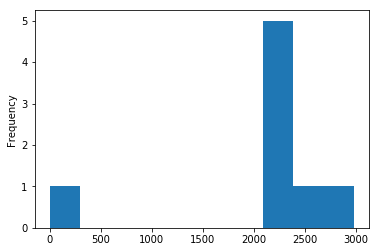

In [239]:
df.isna().sum().plot(kind = 'hist')

In [240]:
#d = df.isna().sum().plot(kind = 'bar')

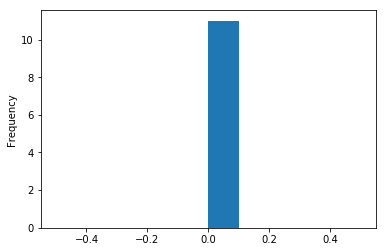

In [241]:
df_work.isna().sum().plot(kind = 'hist')

# 4. Design a graph using Seaborne to compare the distribution of the highest on average paying job title and the lowest average paying job title. If there are two jobs that are on average paid the same, pick whichever you would like.

In [242]:
df4 = df_work.copy()

In [243]:
df44 = df4.groupby('Job_Title')['Annual_Salary'].agg(['mean'])



In [244]:
df44 = df44.reset_index()

In [245]:
df44.columns = ['Job_title','avg_sal']

In [246]:
df44_new = df44[(df44.index == df44.avg_sal.sort_values(ascending = False).nlargest(1).index[0]) | 
    (df44.index == df44.avg_sal.sort_values(ascending = False).nsmallest(1).index[0])]

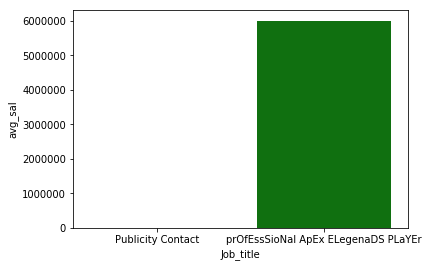

In [247]:
sns.barplot(x = 'Job_title', y = 'avg_sal', data = df44_new, color = 'G')

# 5. Create a column that assigns each row a unique identifier (and id number). Rename columns into [Identifier], [age], [industry], [job_title], [currency], [location], and [post_college experience].

In [248]:
df5 = df_work.copy()

In [249]:
df5.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,IT,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Education,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,


In [250]:
df5['Id'] = df5.groupby(['Timestamp','Industry']).ngroup()

In [251]:
df5['Id'] = df5['Id'] + 1

In [252]:
df5.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State,Id
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN,1
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI,2
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV,4
3,4/24/2019 11:43:27,25-34,IT,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,,3
4,4/24/2019 11:43:29,25-34,Education,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,,5


In [253]:
columnName=['Timestamp','Age','Industry','Job_Title','Annual_Salary',\
            'Currency','Location','Post_College_Experience', 'Country','loc1','State','Identifier']

In [254]:
df5.columns = columnName

In [255]:
df5.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Post_College_Experience,Country,loc1,State,Identifier
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN,1
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI,2
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV,4
3,4/24/2019 11:43:27,25-34,IT,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,,3
4,4/24/2019 11:43:29,25-34,Education,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,,5


# 6. Use the identifiers that you created from question 4. Find entries that contain annual salaries that are over 60,000 (also can be shown as 60000) and have less or equal to 5 years of professional work experience. Show your findings in one table and show at least 11 rows of that table.

In [256]:
df6 = df5.copy()

In [257]:
df6.head(1)

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Post_College_Experience,Country,loc1,State,Identifier
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN,1


In [258]:
df6[(df6['Annual_Salary'] >= 60000.0) & (df6['Post_College_Experience'] <= 5)].head(11)

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Post_College_Experience,Country,loc1,State,Identifier
35,4/24/2019 11:43:55,18-24,Communications,Analyst,68000.0,USD,"Boston, MA, United States of America",1,USA,BOSTON,MA,32
47,4/24/2019 11:44:01,25-34,Government,Biologist,86179.0,USD,"Alexandria, VA, USA",3,USA,ALEXANDRIA,VA,42
83,4/24/2019 11:44:38,25-34,Retail,Consultant,75000.0,USD,"Philadelphia, PA suburbs",3,USA,PHILADELPHIA,,80
104,4/24/2019 11:45:03,25-34,Law,Associate Attorney,125000.0,USD,"Philadelphia, PA, USA",3,USA,PHILADELPHIA,PA,99
131,4/24/2019 11:45:32,25-34,IT,Technician/Engineer,72000.0,USD,"St, Louis, MO, USA",3,USA,ST,,125
134,4/24/2019 11:45:33,18-24,Government,Technician/Engineer,70000.0,USD,"Dallas, Texas, US",3,USA,DALLAS,TX,126
155,4/24/2019 11:46:05,25-34,Pharma,R&D Chemist,72500.0,USD,"Chester,PA,USA",3,USA,CHESTER,PA,146
166,4/24/2019 11:46:21,25-34,Logistics,Educational audiologist,93100.0,USD,Unknown,3,USA,UNKNOWN,,159
188,4/24/2019 11:46:46,45-54,Government,Director,82500.0,CAD,"Edmonton, Alberta, Canada",3,Canada,EDMONTON,,179
242,4/24/2019 11:47:51,25-34,Construction,Analyst,73000.0,USD,Yuma Arizona,3,USA,YUMA ARIZONA,,229


# 7. Create a new column that shows true of false on whether their job tiltes are Data Scientist or containing "Data Scien". Show how many of them are there in this data set and what location contains the most of them. If two or more locations have the same amount of results, show all of them. Show your findings in one table.


In [259]:
#df_work['Job_Title'].str.lower().str.startswith('data scien')

In [260]:
df7 = df_work.copy()

In [261]:
#(df7['Job_Title'] == 'Director').count()

In [262]:
df7['Job_Title'].str.lower().str.startswith('data scien').sum()

54

In [263]:
#df7.head()

In [264]:
df7['Question_7'] = df7['Job_Title'].str.lower().str.startswith('data scien', 0)

In [265]:
total = df7['Question_7'].sum()

In [266]:
print('There are ' + str(total)+  ' people with job titles Data Scientist or contains Data Scien')

There are 54 people with job titles Data Scientist or contains Data Scien


In [267]:
df7[(df7['Question_7'] == True)].groupby('State')['State'].count().sort_values(ascending = False)

State
      32
CA     6
NY     3
DC     3
VA     2
MD     2
PA     1
OR     1
ME     1
MA     1
IN     1
CO     1
Name: State, dtype: int64

# 8. If you are over or equal to 25 years old, what is the probability that you make over or equal to 100k. Use some kind of statistical framework to show how you can achieve that goal by taking advantages of your location, industry and professional experience.

In [268]:
df8 = df_work.copy()

In [269]:
df8.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN
1,4/24/2019 11:43:26,25-34,IT,Director,65000.0,USD,"Madison, Wi",9,USA,MADISON,WI
2,4/24/2019 11:43:27,18-24,Marketing and Sales,Market Research Assistant,36330.0,USD,"Las Vegas, NV",3,USA,LAS VEGAS,NV
3,4/24/2019 11:43:27,25-34,IT,Senior Scientist,43942.0,GBP,"Cardiff, UK",6,UK,CARDIFF,
4,4/24/2019 11:43:29,25-34,Education,Socialist,55000.0,USD,"Southeast Michigan, USA",6,USA,SOUTHEAST MICHIGAN,


In [270]:
greater_25 = (df8['Age'] == '25-34').sum()

In [271]:
greater_25_100K = ((df8['Age'] == '25-34') & (df8['Annual_Salary'] >= 100000)).sum()

In [272]:
total_100K = (df8['Annual_Salary'] >= 100000).sum()

In [273]:
probability = (greater_25_100K/total_100K)

In [274]:
print('The probability that if age is 25 years or more then salary is above 100K is: ' + str(probability))

The probability that if age is 25 years or more then salary is above 100K is: 0.30491535794411584


In [275]:
df_age_salary = df8[(df8['Age'] == '25-34') & (df8['Annual_Salary'] >= 100000)]

In [276]:
len(df_age_salary)

1495

In [277]:
df_age_salary.groupby(['State']).agg({'Annual_Salary':'mean', 'Work_Exp':'mean'}).\
sort_values(by = 'Annual_Salary', ascending = False).head(10)


,Annual_Salary,Work_Exp
State,,
,200230.206667,8.148333
IN,190750.000000,10.000000
CA,164388.199052,8.071090
NY,158985.076336,8.763359
UT,155000.000000,7.000000
TX,151230.027027,8.351351
MN,150026.954545,8.454545
NJ,144218.181818,8.727273
PA,143987.346154,8.769231


In [278]:
df_age_salary.groupby(['Country', 'Industry']).agg({'Annual_Salary':'sum', 'Work_Exp':'mean'}).\
sort_values(by = 'Country', ascending = False).head(20)


#['Annual_Salary'].sum().sort_values(ascending = False).head(20)

Annual_Salary   Work_Exp
Country Industry                                      
USA     Food                       656500.0   7.000000
        Fundraising                235000.0  15.000000
        Pharma                    2599400.0   7.571429
        People Analytics           140000.0   6.000000
        PR                         114000.0   9.000000
        Oil and Gas               2722500.0   9.315789
        Nuclear                    114000.0   9.000000
        Museums                    106000.0   9.000000
        Metals                     205009.0   9.000000
        Merchandising              114000.0   9.000000
        Media and Journalism       328000.0   7.000000
        Marketing and Sales       4916500.0   9.552632
        Manufacturing             8426941.0   8.785714
        Management                3331500.0   8.739130
        Logistics                 1617500.0   7.454545
        Legal                     8142200.0   6.613636
        Law                      13212098.0   5.605634
        In house legal dept        101000.0   3.000000
        IT                       84558687.0   8.136691
        Heavy Equipment            130000.0  15.000000

# 9. Find 3 interesting insights from the data set. Write a brief report on these insights as if you are going to present to the corresponding HR data science team in your company. The report should be written in a Jupyter Notebook using markdown, and should not be excessively long. Show your findings, mention the model or technique used to identify each finding, but do not go into details about your code.

In [279]:
df9 = df_work.copy()

In [332]:
df9.groupby('Country')['Annual_Salary'].sum().sort_values(ascending = False)

Country
USA                      1.566960e+09
UK                       5.200614e+07
Canada                   4.958054e+07
Australia/New Zealand    1.799881e+07
South Africa             6.032280e+06
Switzerland              1.529354e+06
Sweden                   8.820416e+05
Japan                    8.535000e+05
Hong Kong                6.897800e+05
Name: Annual_Salary, dtype: float64

In [281]:
df9.head(1)

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,35-44,Government,Analyst,75000.0,USD,"Nashville, TN",15,USA,NASHVILLE,TN


In [282]:
df9[(df9['Job_Title'] == 'Data Scientist')].groupby('State').agg({'State':'count', 'Annual_Salary':'mean'})

,State,Annual_Salary
State,,
,32,105771.562500
CA,6,181666.666667
CO,1,140000.000000
DC,3,117666.666667
IN,1,74500.000000
MA,1,145000.000000
MD,2,97000.000000
ME,1,85000.000000
NY,3,155666.666667


In [283]:
df9.groupby(['State', 'Industry'])['Industry'].count().nlargest(20)

State  Industry           
       IT                     2095
       Education              1692
       Government              692
CA     IT                      468
       Finance                 456
       Manufacturing           404
       Retail                  312
NY     IT                      280
       Unknown                 279
       Services                239
MA     IT                      216
       Marketing and Sales     211
       Management              177
CA     Education               176
NY     Education               174
WA     IT                      166
       Construction            159
DC     IT                      150
TX     IT                      149
       Logistics               147
Name: Industry, dtype: int64

# 10. Create a regression model to to predict a person's salary.

## Linear Regression

In [284]:
df_reg = encodedData.copy()

In [285]:
df_reg_l = encodedData.copy()

In [286]:
indexs = df_reg_l[df_reg_l['Annual_Salary'] == 0].index

In [287]:
df_reg_l.drop(indexs, inplace = True)

In [288]:
index2 = df_reg_l[(df_reg_l['Annual_Salary'] >= 10000) & (df_reg_l['Annual_Salary'] <= 1000000)].index

In [289]:
X = df_reg_l.iloc[:, [7]]
X.head()

,Work_Exp
0,15
1,9
2,3
3,6
4,6


In [290]:
Y = df_reg_l.iloc[: ,4]
Y = Y.astype(int)
Y.head()

0    75000
1    65000
2    36330
3    43942
4    55000
Name: Annual_Salary, dtype: int64

In [291]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [292]:
regressor = LinearRegression()

In [293]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [294]:
y_predicted = regressor.predict(x_test)

In [295]:
y_predicted

array([ 81591.69485993,  81591.69485993,  81591.69485993, ...,
        89893.33168704, 134168.72809832, 134168.72809832])

In [296]:
y_test.head()

13958    250000
9516      73000
4308      81640
14553     92043
737       47500
Name: Annual_Salary, dtype: int64

In [297]:
(y_predicted - y_test).abs().mean()

45364.58396728398

In [298]:
residuals = (y_predicted - y_test)

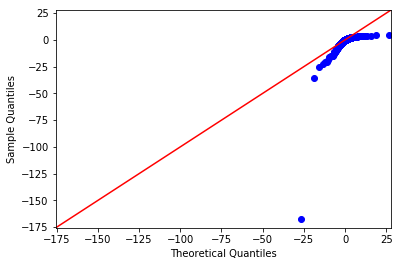

In [299]:
plt.show()
sm.graphics.qqplot(residuals, dist = stats.t, line = '45', fit = True, loc = 0)
plt.show()

## Mulitvairbale Linear Regression

In [300]:
df_reg.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,2,182,57,75000.0,USD,"Nashville, TN",15,8,NASHVILLE,43
1,4/24/2019 11:43:26,1,210,654,65000.0,USD,"Madison, Wi",9,8,MADISON,49
2,4/24/2019 11:43:27,0,263,1098,36330.0,USD,"Las Vegas, NV",3,8,LAS VEGAS,34
3,4/24/2019 11:43:27,1,210,1839,43942.0,GBP,"Cardiff, UK",6,7,CARDIFF,0
4,4/24/2019 11:43:29,1,121,1901,55000.0,USD,"Southeast Michigan, USA",6,8,SOUTHEAST MICHIGAN,0


In [301]:
X = df_reg[['Age',  'Work_Exp']]#.astype(int)

In [302]:
Y = df_reg['Annual_Salary']

In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [304]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [305]:
y_predicted = regressor.predict(X_test)

In [306]:
y_predicted

array([76164.33911199, 76164.33911199, 76164.33911199, ...,
       91106.68612474, 81043.9426596 , 71284.73556438])

In [307]:
(y_predicted - Y_test).abs().mean()

65603.27033248752

## Polynomial Regression

In [308]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [309]:
poly_reg = PolynomialFeatures(degree = 4)

In [310]:
x_poly = poly_reg.fit_transform(X)
poly_reg.fit(x_poly, Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# 11. Create a classification model to to predict a person's job title.

In [311]:
df_reg.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,2,182,57,75000.0,USD,"Nashville, TN",15,8,NASHVILLE,43
1,4/24/2019 11:43:26,1,210,654,65000.0,USD,"Madison, Wi",9,8,MADISON,49
2,4/24/2019 11:43:27,0,263,1098,36330.0,USD,"Las Vegas, NV",3,8,LAS VEGAS,34
3,4/24/2019 11:43:27,1,210,1839,43942.0,GBP,"Cardiff, UK",6,7,CARDIFF,0
4,4/24/2019 11:43:29,1,121,1901,55000.0,USD,"Southeast Michigan, USA",6,8,SOUTHEAST MICHIGAN,0


In [312]:
X = df_reg.drop(['Timestamp', 'Job_Title', 'Currency', 'Location', 'loc1'], axis = 1)

In [313]:
Y = df_reg['Job_Title']


In [314]:
train_test_split(X,Y,test_size=0.3,random_state = 0)

[       Age  Industry  Annual_Salary  Work_Exp  Country  State
 16236    1       261       64000.00         6        8      0
 4995     1       389      150000.00         9        8     44
 14450    1       371      115000.00         6        8      0
 13447    2       121       74345.00        15        8     39
 14365    1       389       93000.00         9        8      0
 11418    2       210      150000.00        15        8      0
 13176    1       261      102000.00         9        8     41
 11323    1       210      125000.00         9        8     46
 9138     1       121       38111.43         9        7      0
 10779    2       371       12446.00        15        7      0
 2189     2       150      107000.00        15        8     21
 10574    1       261       75660.00         6        8      0
 16344    1       210      120000.00         6        8     48
 4423     2       154       36000.00        15        1      0
 9882     1       371       60000.00         9        8

In [315]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [316]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

/Users/kalyani/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [317]:
y_pred = cl.predict(X_test)

In [318]:
(y_pred - Y_test).abs().mean()

780.0746722401672

In [319]:
(cl.predict(X_test) == Y_test).mean()

0.20558616758502754

# 12. (Bonus Question): Create a clustering model and use it to identify an interesting pattern.


In [320]:
df_reg.head()

,Timestamp,Age,Industry,Job_Title,Annual_Salary,Currency,Location,Work_Exp,Country,loc1,State
0,4/24/2019 11:43:21,2,182,57,75000.0,USD,"Nashville, TN",15,8,NASHVILLE,43
1,4/24/2019 11:43:26,1,210,654,65000.0,USD,"Madison, Wi",9,8,MADISON,49
2,4/24/2019 11:43:27,0,263,1098,36330.0,USD,"Las Vegas, NV",3,8,LAS VEGAS,34
3,4/24/2019 11:43:27,1,210,1839,43942.0,GBP,"Cardiff, UK",6,7,CARDIFF,0
4,4/24/2019 11:43:29,1,121,1901,55000.0,USD,"Southeast Michigan, USA",6,8,SOUTHEAST MICHIGAN,0


In [321]:
df_clust = df_reg.drop(['loc1','Location', 'Currency','Timestamp'], axis = 1).copy()

In [322]:
clu = KMeans(n_clusters=3, random_state=0)

In [323]:
clu.fit(df_clust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [324]:
clu.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [325]:
df_clust2 = df_clust.copy()

In [326]:
df_clust2['cluster']=clu.labels_

In [327]:
df_clust2.head()

,Age,Industry,Job_Title,Annual_Salary,Work_Exp,Country,State,cluster
0,2,182,57,75000.0,15,8,43,0
1,1,210,654,65000.0,9,8,49,0
2,0,263,1098,36330.0,3,8,34,0
3,1,210,1839,43942.0,6,7,0,0
4,1,121,1901,55000.0,6,8,0,0


In [328]:
df_clust2.groupby('cluster').mean()

,Age,Industry,Job_Title,Annual_Salary,Work_Exp,Country,State
cluster,,,,,,,
0,1.682041,207.589795,846.977366,9.047506e+04,11.64561,7.456727,12.743957
1,3.000000,261.000000,32.000000,8.200000e+07,15.00000,8.000000,15.000000
2,1.000000,414.000000,2032.000000,2.760000e+07,3.00000,8.000000,0.000000
